In [2]:
!pip install langgraph langchain-openai tavily-python langchain-community --quiet

In [3]:
import os

In [7]:
os.environ["TAVILY_API_KEY"] = "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"

os.environ["LANGSMITH_TRACING"]="true"
os.environ["LANGSMITH_ENDPOINT"]="https://api.smith.langchain.com"
os.environ["LANGSMITH_API_KEY"]="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"

os.environ["LANGCHAIN_ENDPOINT"]="https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"]="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"
os.environ["LANGSMITH_PROJECT"]="langgraph-intro"

In [8]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [9]:
tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

In [10]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# add a chatbot node
graph_builder.add_node("chatbot", chatbot)

# add a tool node
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

# create an edge
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

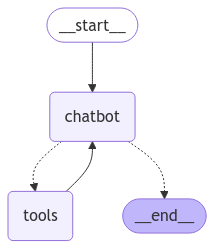

In [11]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [14]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  what do you know about langchain


Assistant: 
Assistant: [{"url": "https://python.langchain.com/docs/introduction/", "content": "How to use tools in a chain How to migrate from legacy LangChain agents to LangGraph How to use chat models to call tools LangChain is a framework for developing applications powered by large language models (LLMs). Development: Build your applications using LangChain's open-source building blocks, components, and third-party integrations. langchain: Chains, agents, and retrieval strategies that make up an application's cognitive architecture. LangServe: Deploy LangChain chains as REST APIs. LangSmith: A developer platform that lets you debug, test, evaluate, and monitor LLM applications. Build stateful, multi-actor applications with LLMs. Integrates smoothly with LangChain, but can be used without it. LangChain is part of a rich ecosystem of tools that integrate with our framework and build on top of it."}, {"url": "https://www.geeksforgeeks.org/introduction-to-langchain/", "content": "Data 

User:  is langchain an llm provider ?


Assistant: 
Assistant: [{"url": "https://metaschool.so/articles/what-is-langchain-complete-guide-2025", "content": "LangChain is an open-source framework that streamlines the development of applications with features that make use of large language models (LLMs). It provides a suite of tools and integrations that make the task of integrating with an LLM easier (and supports linking with many popular LLMs including the GPT models), for example in tasks such as natural language processing, data retrieval, and interaction with various data sources. LangChain’s modular architecture supports key features like memory (to maintain context over interactions), tool integration (such as APIs and databases), and an agent framework for decision-making and task execution. Developers can leverage LangChain’s pre-built modules and chains to rapidly prototype and scale AI applications, integrating LLMs with APIs, databases, and other tools to enhance natural language understanding and generation capab

User:  does it help you train or finetune models?


Assistant: I don't have the capability to train or finetune models myself. However, I can provide information and guidance on how model training and fine-tuning can be done, as well as the concepts and methodologies involved in the process. If you have specific questions about model training or fine-tuning, feel free to ask!


User:  can you train models using langchain


Assistant: Yes, LangChain is a framework designed for developing applications powered by language models. It provides various functionalities, including model training, handling data, and integration with various LLMs (Large Language Models). With LangChain, you can build sophisticated applications that utilize language models for tasks like question answering, summarization, and other NLP tasks.

While LangChain itself does not directly train models from scratch, it allows developers to fine-tune existing models and manage workflows that involve model inference, prompt engineering, and connecting to external data sources. For training models, you generally use a machine learning library or framework alongside LangChain for managing the model training process.


User:  what can i use to train my own llm models


Assistant: 
Assistant: [{"url": "https://airbyte.com/data-engineering-resources/how-to-train-llm-with-your-own-data", "content": "So, when you train an LLM on the focused dataset, it does not have to process large amounts of data to find precise answers to your queries. This improves the performance of LLMs and also makes your business workflow efficient. To Control Training Datasets. To train LLMs on your own data, you first need to prepare your industry-specific dataset."}, {"url": "https://alican-kiraz1.medium.com/build-your-own-llm-a-complete-guide-to-training-llm-models-with-hugging-face-transformers-bf15cbc86a58", "content": "Afterward, we'll train a base LLM model, create our own LLM, and upload it to Hugging Face. While reading this article, you can also experiment with the sample training code I've provided. With this code, you can download a model from Hugging Face and train it on a suitable dataset (with Instruction, Input, and Output columns)."}]
Assistant: To train your ow

User:  quit


Assistant: LangGraph is a library within the LangChain ecosystem designed to simplify the development of complex, multi-agent applications that utilize large language models (LLMs). Here are some key features of LangGraph:

1. **Stateful Systems**: LangGraph allows for the creation of stateful applications, meaning that it can manage the state of interactions over time, which is crucial for building responsive AI-driven applications.

2. **Graph-Based Structure**: It uses graphs to define the flows and cycles of interactions, making it easier to visualize and manage the relationships between different components of the application.

3. **Tool-Calling Agents**: LangGraph supports the development of agents that can call various tools and APIs, enabling more dynamic interactions and functionalities.

4. **Integration with LangChain**: It seamlessly integrates with the broader LangChain ecosystem, allowing developers to take advantage of additional tools and libraries available there.

5. 

### Memory Saving using Checkpointer

Allows you to save the state at a certain point, so LLMs can have access to earlier messages/context

In [15]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [17]:
graph_builder = StateGraph(State)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# add a chatbot node
graph_builder.add_node("chatbot", chatbot)

# add a tool node
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

# create an edge
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

# build the graph using checkpointer
graph = graph_builder.compile(checkpointer=memory)

In [18]:
config = {"configurable": {"thread_id": "1"}}
user_input = "Hi there! My name is Will."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Will.
================================== Ai Message ==================================

Hi Will! How can I assist you today?


In [20]:
user_input = "Remember my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,# {"configurable": {"thread_id": "2"}},#config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

I'm sorry, but I don't have the ability to remember personal information or previous interactions. How can I assist you today?


In [22]:
# snapshot = graph.get_state(config)
# snapshot